In [3]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [4]:
# Importing Dataset
df=pd.read_csv('heart.csv')

In [5]:
# Checking first five row of dataset
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# Some feature full form are given below:
# cp: Chest Pain Type, chol: cholistrol, trestbps=Resting BP, fbs=fasting blood sugar, restecg=Resting ECG, restecg=Resting ECG, thalach=max heart rate, exang=Exercise Induced Angina, slope= slope of ST, ca=Number of major Vessels, thal=Thalassemia

In [7]:
# Checking last five row of dataset
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
# Checking null values in dataset and sum the null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Checking the decription of dataset which include mean,meadian,mode,maximum value,standard deviation & percentile
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Checking the information of data such as data is in integer or floar and check non null or null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


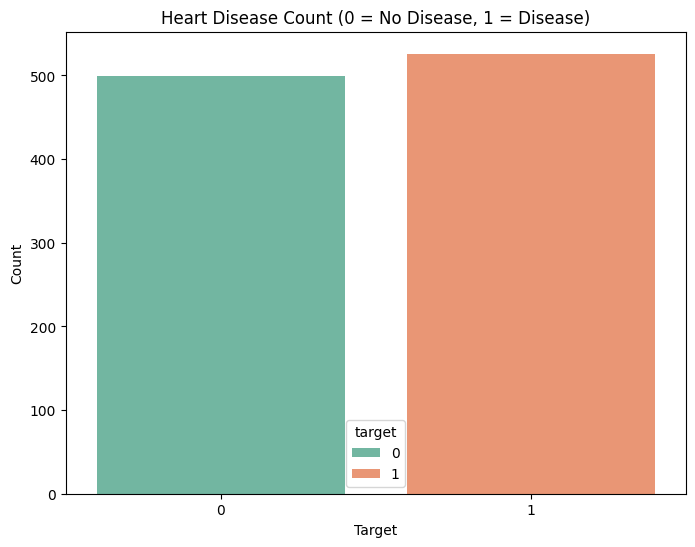

In [11]:
# Visualize the disease is yes or not (1 or 0) by using countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target', hue='target', palette='Set2')
plt.title('Heart Disease Count (0 = No Disease, 1 = Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


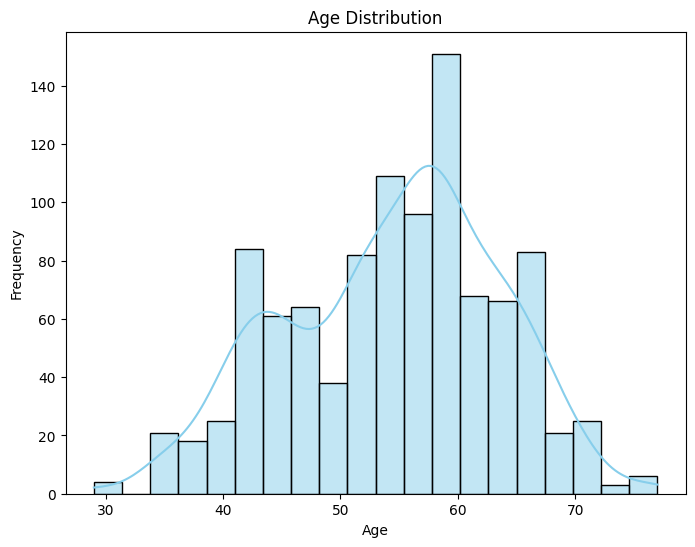

In [12]:
# Visualize the age distribution by using histplot
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

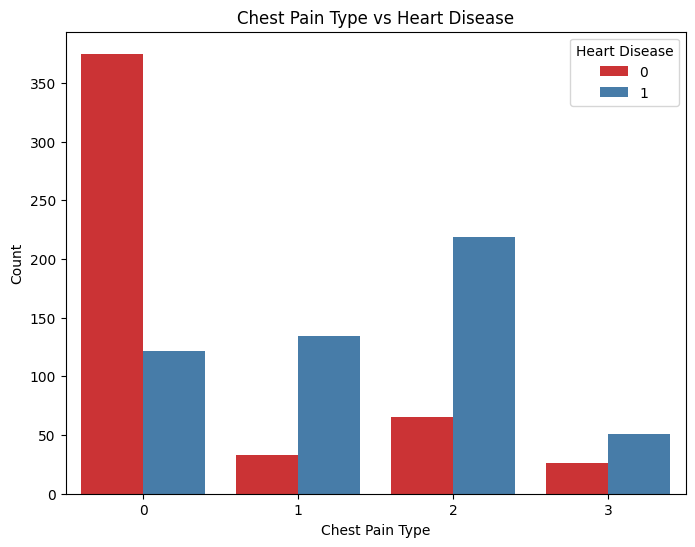

In [13]:
# Visualize the chest pain type vs heart disease by using countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cp', hue='target', palette='Set1')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

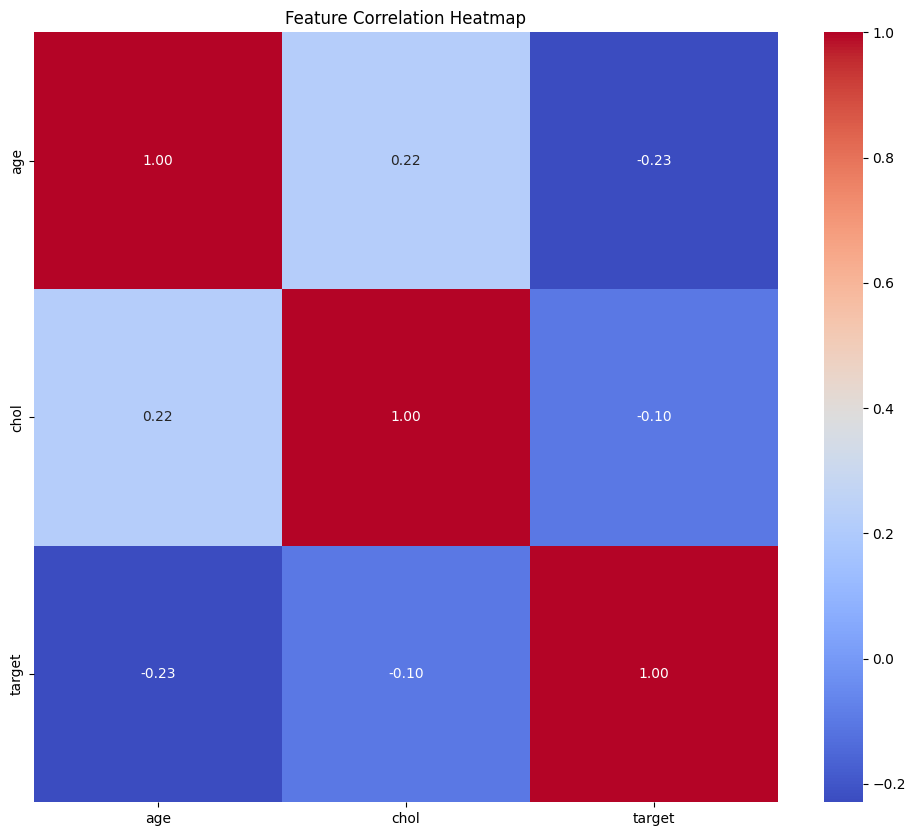

In [14]:
# Visualize the correlation b/w age, cholestrol and target features
df1=df[['age','chol','target']]  # create new dataframe df1 which store feature for correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

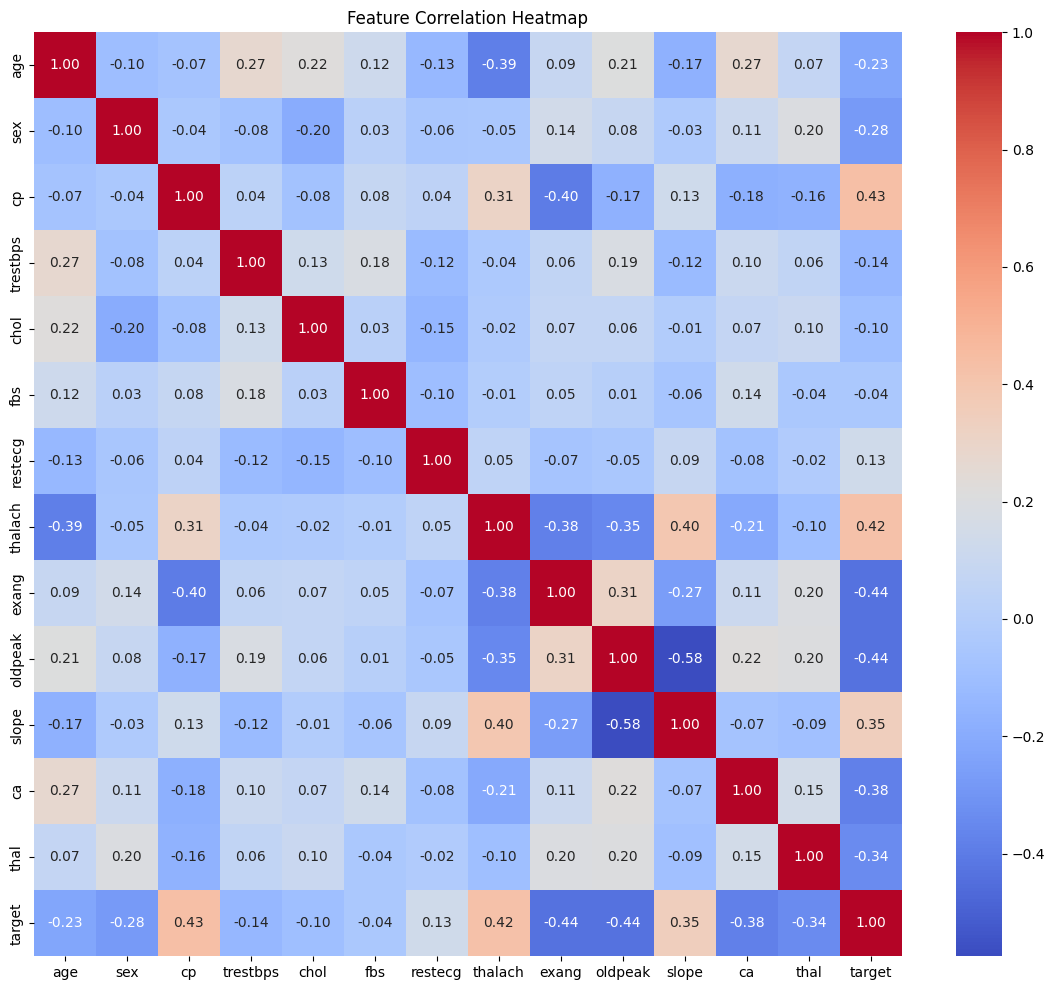

In [15]:
# Visualize features correlation heatmap 
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [16]:
# Feature Engineering & Selection
df['age_group'] = pd.cut(df['age'], bins=[29, 40, 55, 70, 80], labels=['Young', 'Mid-age', 'Senior', 'Elder'])
df['chol_level'] = pd.cut(df['chol'], bins=[0, 200, 240, 600], labels=['Normal', 'High', 'Very High'])

In [17]:
df['cp_exang'] = df['cp'] * df['exang']
df['age_oldpeak'] = df['age'] * df['oldpeak']

In [18]:
df_encoded = pd.get_dummies(df, columns=['cp', 'thal', 'slope', 'age_group', 'chol_level'], drop_first=True)

In [19]:
df_encoded['risk_score'] = (
    (df_encoded['trestbps'] > 130).astype(int) +
    (df_encoded['chol'] > 240).astype(int) +
    (df_encoded['fbs'] > 0).astype(int) +
    (df_encoded['oldpeak'] > 2).astype(int)
)

In [20]:
# Model Training
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Models
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

In [24]:
lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [25]:
#Predictions
lr_pred = lr.predict(X_test_scaled)
dt_pred = dt.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)

In [26]:
#Model Evaluation & Tuning

def evaluate(name, y_true, y_pred, model, X_test_scaled):
    print(f"\n {name} Report")
    print(classification_report(y_true, y_pred))
    roc = roc_auc_score(y_true, model.predict_proba(X_test_scaled)[:, 1])
    print(f"ROC-AUC Score: {roc:.2f}")
    
evaluate("Logistic Regression", y_test, lr_pred, lr, X_test_scaled)
evaluate("Decision Tree", y_test, dt_pred, dt, X_test_scaled)
evaluate("Random Forest", y_test, rf_pred, rf, X_test_scaled)


 Logistic Regression Report
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       102
           1       0.80      0.85      0.83       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205

ROC-AUC Score: 0.90

 Decision Tree Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

ROC-AUC Score: 0.99

 Random Forest Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg 

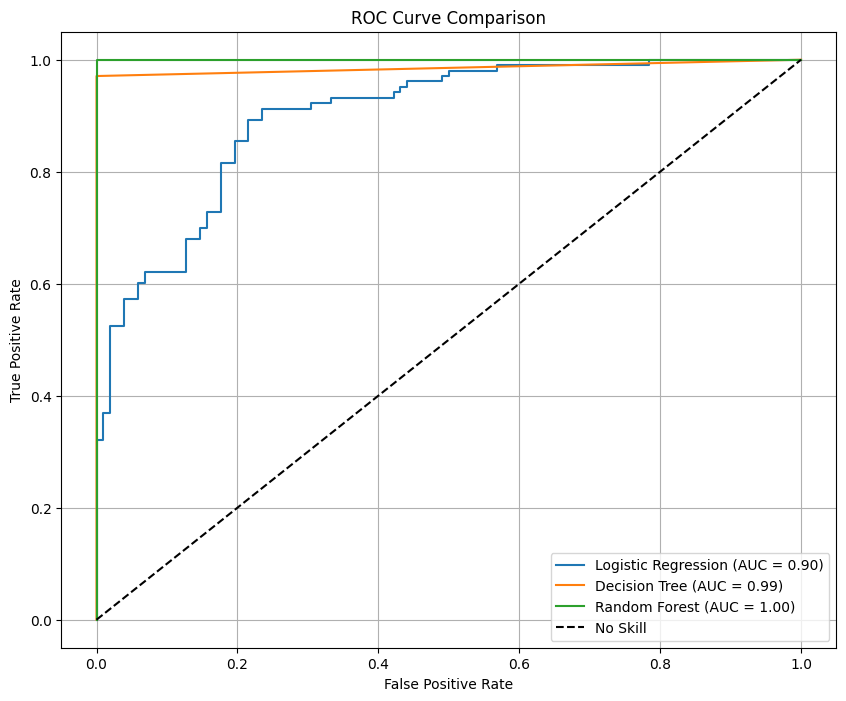

In [27]:
# ROC Curve Plot for All Models
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
# Logistic Regression
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Decision Tree
dt_probs = dt.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Random Forest
rf_probs = rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Random line
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [28]:
# Implementation Context
print("\nThis model can help hospitals or clinics assess the risk of heart disease using basic clinical data.")
print("It enables early diagnosis and proactive care, reducing severe health events.")


This model can help hospitals or clinics assess the risk of heart disease using basic clinical data.
It enables early diagnosis and proactive care, reducing severe health events.


In [ ]:
import joblib

joblib.dump(rf, 'rf_model.pkl')              # model save
joblib.dump(scaler, 'scaler.pkl')            # scaler save
joblib.dump(X.columns.tolist(), 'columns.pkl')  # training column name save


['columns.pkl']